# Part 1: Model a deep feed forward network for regression

In [2]:
import numpy as np
import math
import keras
from keras.models import Sequential,Model
from keras.layers import Activation, Dense,Input
from keras.utils.vis_utils import plot_model
from keras import optimizers
from keras.models import Model
from keras.optimizers import SGD
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

## Generate dataset

In [2]:
def calculateY(x):
    y=[]
    y.append((2*x[0]*x[1]*x[2]) + (x[3]*x[4]) - (3*x[5]*x[6]*x[7]) - (7*(x[0]**2)*x[7]) + (2*x[4]))
    y.append((2*x[0]*x[4]*x[5]) - (x[2]*x[3]) - (3*x[1]*x[2]) - ((x[1]**2)*x[3]) - (2*x[6]*x[7]) + 1)
    y.append(((x[2]**2)) - (x[4]*x[6]) - (3*x[0]*x[3]*x[5]) - (12*(x[0]**2)*x[1]*x[3]) - 2)
    y.append(((x[5]**3)) - (5*x[0]*x[2]*x[7]) - (x[0]*x[3]*x[6]) - (2*(x[4]**2)*x[1]*x[3]) - (3*x[7]))
    y.append(((x[2]**2)*x[4]) - (2*x[2]*x[3]*x[7]) - (x[0]*x[1]*x[3]) - (3*x[5]) + ((x[0]**2)*x[6]) - 1)
    return y

In [3]:
def generateInstances(nt):
    X = np.random.random(size=(nt, 8))
    print("X :" , X.shape)
    np.set_printoptions(suppress=True)
    Y = np.zeros((nt,5))
    print("Y: ",Y.shape)
    for i in range(len(X)):
        y_row=[]
        y_row=calculateY(X[i])
        Y[i,:]=y_row
    return X,Y

## Add noise

In [4]:
X_train,Y_train = generateInstances(600)
mu=0
sigma=0.001
noise = np.random.normal(mu, sigma, (600,5))
Y_train=Y_train+noise

X : (600, 8)
Y:  (600, 5)


## Create Model

In [5]:
def show_history(history):  #train ve validation datası için accuracy ve loss grafiklerini çiz
    print(history.history.keys())
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [6]:
def create_model(activ_value,lr_value,epoch_value): 
    model = Sequential()
    model.add(Dense(4, input_dim=8, activation = activ_value))
    model.add(Dense(4, activation= activ_value))
    model.add(Dense(4, activation=activ_value))
    model.add(Dense(5, activation='linear'))
    sgd = optimizers.SGD(lr=lr_value, decay=0.0, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    history=model.fit(X_train, Y_train, validation_split=0.30, epochs=epoch_value)
    score = model.evaluate(X_train, Y_train)
    print(model.summary())
    return history,score[1]*100

## Find best activitation

In [7]:
activ_values = ['softplus','elu','relu']
scores = list()

In [8]:
history,score=create_model(activ_values[0],0.005,80)

Train on 420 samples, validate on 180 samples
Epoch 1/80
420/420 [==============================] - 0s 511us/step - loss: 6.7558 - acc: 0.6190 - val_loss: 4.9926 - val_acc: 0.5944
Epoch 2/80
420/420 [==============================] - 0s 47us/step - loss: 3.6092 - acc: 0.6190 - val_loss: 2.4309 - val_acc: 0.5944
Epoch 3/80
420/420 [==============================] - 0s 36us/step - loss: 2.1131 - acc: 0.6190 - val_loss: 2.0290 - val_acc: 0.5944
Epoch 4/80
420/420 [==============================] - 0s 52us/step - loss: 1.9697 - acc: 0.6190 - val_loss: 2.0034 - val_acc: 0.5944
Epoch 5/80
420/420 [==============================] - 0s 55us/step - loss: 1.9419 - acc: 0.6190 - val_loss: 1.9806 - val_acc: 0.5944
Epoch 6/80
420/420 [==============================] - 0s 52us/step - loss: 1.9168 - acc: 0.6190 - val_loss: 1.9665 - val_acc: 0.5944
Epoch 7/80
420/420 [==============================] - 0s 50us/step - loss: 1.8981 - acc: 0.6190 - val_loss: 1.9518 - val_acc: 0.5944
Epoch 8/80
420/420 [==

Epoch 62/80
420/420 [==============================] - 0s 40us/step - loss: 1.0683 - acc: 0.6976 - val_loss: 1.0776 - val_acc: 0.7333
Epoch 63/80
420/420 [==============================] - 0s 64us/step - loss: 1.0589 - acc: 0.6952 - val_loss: 1.0599 - val_acc: 0.7500
Epoch 64/80
420/420 [==============================] - 0s 55us/step - loss: 1.0583 - acc: 0.7143 - val_loss: 1.0545 - val_acc: 0.7500
Epoch 65/80
420/420 [==============================] - 0s 52us/step - loss: 1.0483 - acc: 0.6952 - val_loss: 1.0592 - val_acc: 0.7389
Epoch 66/80
420/420 [==============================] - 0s 62us/step - loss: 1.0440 - acc: 0.7048 - val_loss: 1.0929 - val_acc: 0.7333
Epoch 67/80
420/420 [==============================] - 0s 62us/step - loss: 1.0514 - acc: 0.7190 - val_loss: 1.0574 - val_acc: 0.7611
Epoch 68/80
420/420 [==============================] - 0s 57us/step - loss: 1.0360 - acc: 0.7024 - val_loss: 1.0500 - val_acc: 0.7389
Epoch 69/80
420/420 [==============================] - 0s 57us

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


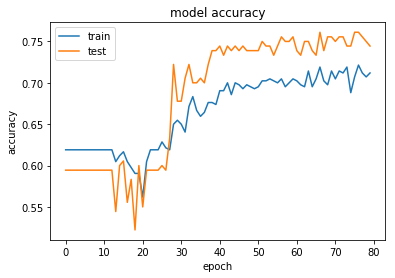

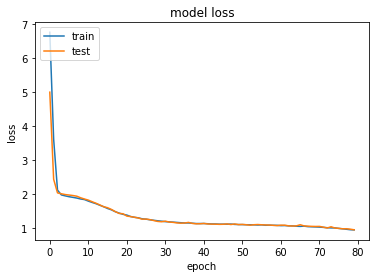

In [9]:
show_history(history)
scores.append(score)

In [10]:
history,score=create_model(activ_values[1],0.005,80)

Train on 420 samples, validate on 180 samples
Epoch 1/80
420/420 [==============================] - 0s 508us/step - loss: 4.7569 - acc: 0.2667 - val_loss: 2.3279 - val_acc: 0.3944
Epoch 2/80
420/420 [==============================] - 0s 45us/step - loss: 2.0186 - acc: 0.5000 - val_loss: 1.9600 - val_acc: 0.5944
Epoch 3/80
420/420 [==============================] - 0s 55us/step - loss: 1.8599 - acc: 0.6190 - val_loss: 1.8481 - val_acc: 0.5944
Epoch 4/80
420/420 [==============================] - 0s 62us/step - loss: 1.7879 - acc: 0.6190 - val_loss: 1.8061 - val_acc: 0.5944
Epoch 5/80
420/420 [==============================] - 0s 55us/step - loss: 1.7458 - acc: 0.6190 - val_loss: 1.7401 - val_acc: 0.5944
Epoch 6/80
420/420 [==============================] - 0s 52us/step - loss: 1.6964 - acc: 0.6190 - val_loss: 1.6736 - val_acc: 0.5944
Epoch 7/80
420/420 [==============================] - 0s 52us/step - loss: 1.6304 - acc: 0.6190 - val_loss: 1.6193 - val_acc: 0.5944
Epoch 8/80
420/420 [==

Epoch 62/80
420/420 [==============================] - 0s 47us/step - loss: 0.5987 - acc: 0.9095 - val_loss: 0.6169 - val_acc: 0.8778
Epoch 63/80
420/420 [==============================] - 0s 43us/step - loss: 0.5995 - acc: 0.9071 - val_loss: 0.6105 - val_acc: 0.8722
Epoch 64/80
420/420 [==============================] - 0s 40us/step - loss: 0.5929 - acc: 0.9119 - val_loss: 0.6241 - val_acc: 0.8778
Epoch 65/80
420/420 [==============================] - 0s 47us/step - loss: 0.5965 - acc: 0.9119 - val_loss: 0.6038 - val_acc: 0.8833
Epoch 66/80
420/420 [==============================] - 0s 47us/step - loss: 0.5880 - acc: 0.9071 - val_loss: 0.6070 - val_acc: 0.8722
Epoch 67/80
420/420 [==============================] - 0s 38us/step - loss: 0.5852 - acc: 0.9071 - val_loss: 0.5968 - val_acc: 0.8722
Epoch 68/80
420/420 [==============================] - 0s 55us/step - loss: 0.5827 - acc: 0.9143 - val_loss: 0.5960 - val_acc: 0.8944
Epoch 69/80
420/420 [==============================] - 0s 43us

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


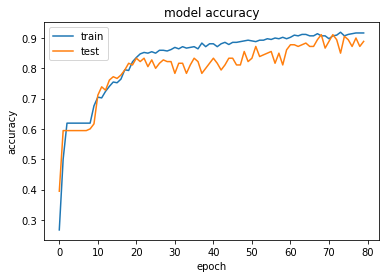

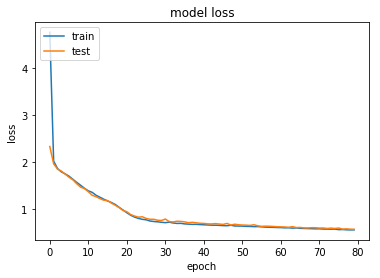

In [11]:
show_history(history)
scores.append(score)

In [12]:
history,score=create_model(activ_values[2],0.005,80)

Train on 420 samples, validate on 180 samples
Epoch 1/80
420/420 [==============================] - 0s 893us/step - loss: 6.3076 - acc: 0.4214 - val_loss: 5.4574 - val_acc: 0.5944
Epoch 2/80
420/420 [==============================] - 0s 50us/step - loss: 4.6535 - acc: 0.6190 - val_loss: 4.0333 - val_acc: 0.5944
Epoch 3/80
420/420 [==============================] - 0s 57us/step - loss: 3.4654 - acc: 0.6190 - val_loss: 3.1149 - val_acc: 0.5944
Epoch 4/80
420/420 [==============================] - 0s 66us/step - loss: 2.7621 - acc: 0.6190 - val_loss: 2.6234 - val_acc: 0.5944
Epoch 5/80
420/420 [==============================] - 0s 47us/step - loss: 2.3922 - acc: 0.6190 - val_loss: 2.3693 - val_acc: 0.5944
Epoch 6/80
420/420 [==============================] - 0s 55us/step - loss: 2.2085 - acc: 0.6190 - val_loss: 2.2417 - val_acc: 0.5944
Epoch 7/80
420/420 [==============================] - 0s 50us/step - loss: 2.1144 - acc: 0.6190 - val_loss: 2.1775 - val_acc: 0.5944
Epoch 8/80
420/420 [==

Epoch 62/80
420/420 [==============================] - 0s 55us/step - loss: 0.9538 - acc: 0.7595 - val_loss: 0.9214 - val_acc: 0.7222
Epoch 63/80
420/420 [==============================] - 0s 55us/step - loss: 0.9462 - acc: 0.7571 - val_loss: 0.9223 - val_acc: 0.7278
Epoch 64/80
420/420 [==============================] - 0s 47us/step - loss: 0.9431 - acc: 0.7548 - val_loss: 0.9114 - val_acc: 0.7333
Epoch 65/80
420/420 [==============================] - 0s 43us/step - loss: 0.9352 - acc: 0.7548 - val_loss: 0.9239 - val_acc: 0.7278
Epoch 66/80
420/420 [==============================] - 0s 55us/step - loss: 0.9308 - acc: 0.7595 - val_loss: 0.8914 - val_acc: 0.7222
Epoch 67/80
420/420 [==============================] - 0s 52us/step - loss: 0.9235 - acc: 0.7476 - val_loss: 0.9147 - val_acc: 0.7167
Epoch 68/80
420/420 [==============================] - 0s 62us/step - loss: 0.9220 - acc: 0.7548 - val_loss: 0.8811 - val_acc: 0.7167
Epoch 69/80
420/420 [==============================] - 0s 55us

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


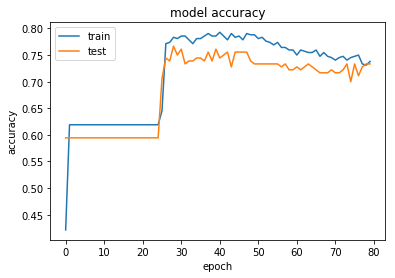

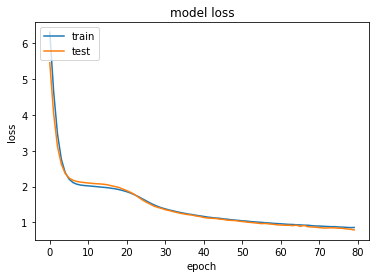

In [13]:
show_history(history)
scores.append(score)

In [14]:
print('Scores: %s' % scores)

best_score = scores[0]
best=0
for i in range(2):
    if(best_score<scores[i]):
        best_score=scores[i]
        best=i
print("Best activation: ", activ_values[best])
best_activ = activ_values[best]


Scores: [72.33333333333334, 91.00000007947287, 73.33333333333333]
Best activation:  elu


## Find best learning rate

In [15]:
lr_values = [0.05, 0.005,0.0005]
scores = list()

In [16]:
history,score=create_model(best_activ,lr_values[0],80)

Train on 420 samples, validate on 180 samples
Epoch 1/80
420/420 [==============================] - 0s 898us/step - loss: 2.9391 - acc: 0.5452 - val_loss: 1.8551 - val_acc: 0.5889
Epoch 2/80
420/420 [==============================] - 0s 64us/step - loss: 1.4236 - acc: 0.6976 - val_loss: 0.9173 - val_acc: 0.7667
Epoch 3/80
420/420 [==============================] - 0s 47us/step - loss: 0.8424 - acc: 0.8381 - val_loss: 0.8165 - val_acc: 0.8556
Epoch 4/80
420/420 [==============================] - 0s 50us/step - loss: 0.7320 - acc: 0.8810 - val_loss: 0.6050 - val_acc: 0.8333
Epoch 5/80
420/420 [==============================] - 0s 40us/step - loss: 0.7228 - acc: 0.8714 - val_loss: 0.6789 - val_acc: 0.8778
Epoch 6/80
420/420 [==============================] - 0s 57us/step - loss: 0.6462 - acc: 0.9000 - val_loss: 0.5557 - val_acc: 0.8556
Epoch 7/80
420/420 [==============================] - 0s 69us/step - loss: 0.5528 - acc: 0.9024 - val_loss: 0.6416 - val_acc: 0.8667
Epoch 8/80
420/420 [==

Epoch 62/80
420/420 [==============================] - 0s 52us/step - loss: 0.4276 - acc: 0.8905 - val_loss: 0.5396 - val_acc: 0.8556
Epoch 63/80
420/420 [==============================] - 0s 57us/step - loss: 0.4006 - acc: 0.8952 - val_loss: 0.4247 - val_acc: 0.8389
Epoch 64/80
420/420 [==============================] - 0s 62us/step - loss: 0.3899 - acc: 0.8952 - val_loss: 0.4465 - val_acc: 0.8667
Epoch 65/80
420/420 [==============================] - 0s 62us/step - loss: 0.3860 - acc: 0.9071 - val_loss: 0.4133 - val_acc: 0.8611
Epoch 66/80
420/420 [==============================] - 0s 64us/step - loss: 0.3791 - acc: 0.8976 - val_loss: 0.5755 - val_acc: 0.8000
Epoch 67/80
420/420 [==============================] - 0s 66us/step - loss: 0.3977 - acc: 0.8857 - val_loss: 0.6078 - val_acc: 0.8667
Epoch 68/80
420/420 [==============================] - 0s 59us/step - loss: 0.3956 - acc: 0.9095 - val_loss: 0.5068 - val_acc: 0.8556
Epoch 69/80
420/420 [==============================] - 0s 64us

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


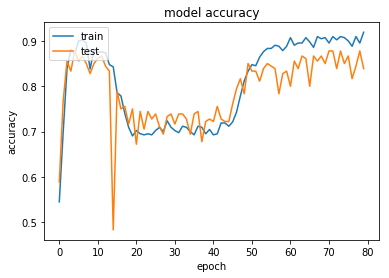

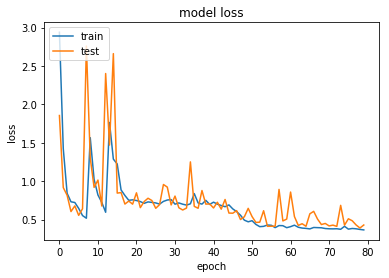

In [17]:
show_history(history)
scores.append(score)

In [18]:
history,score=create_model(best_activ,lr_values[1],80)

Train on 420 samples, validate on 180 samples
Epoch 1/80
420/420 [==============================] - 0s 822us/step - loss: 5.9194 - acc: 0.2381 - val_loss: 4.7253 - val_acc: 0.5556
Epoch 2/80
420/420 [==============================] - 0s 62us/step - loss: 3.1692 - acc: 0.6119 - val_loss: 2.2093 - val_acc: 0.5944
Epoch 3/80
420/420 [==============================] - 0s 55us/step - loss: 1.9154 - acc: 0.6190 - val_loss: 1.8932 - val_acc: 0.5944
Epoch 4/80
420/420 [==============================] - 0s 64us/step - loss: 1.7935 - acc: 0.6190 - val_loss: 1.8173 - val_acc: 0.5944
Epoch 5/80
420/420 [==============================] - 0s 55us/step - loss: 1.6929 - acc: 0.6190 - val_loss: 1.7320 - val_acc: 0.5944
Epoch 6/80
420/420 [==============================] - 0s 69us/step - loss: 1.6146 - acc: 0.6190 - val_loss: 1.6406 - val_acc: 0.5944
Epoch 7/80
420/420 [==============================] - 0s 59us/step - loss: 1.5301 - acc: 0.6190 - val_loss: 1.5503 - val_acc: 0.6111
Epoch 8/80
420/420 [==

Epoch 62/80
420/420 [==============================] - 0s 57us/step - loss: 0.4708 - acc: 0.8905 - val_loss: 0.4698 - val_acc: 0.8944
Epoch 63/80
420/420 [==============================] - 0s 50us/step - loss: 0.4623 - acc: 0.8810 - val_loss: 0.4602 - val_acc: 0.8833
Epoch 64/80
420/420 [==============================] - 0s 57us/step - loss: 0.4581 - acc: 0.8881 - val_loss: 0.4849 - val_acc: 0.9056
Epoch 65/80
420/420 [==============================] - 0s 64us/step - loss: 0.4586 - acc: 0.8952 - val_loss: 0.4537 - val_acc: 0.9000
Epoch 66/80
420/420 [==============================] - 0s 66us/step - loss: 0.4525 - acc: 0.9024 - val_loss: 0.4576 - val_acc: 0.9000
Epoch 67/80
420/420 [==============================] - 0s 55us/step - loss: 0.4476 - acc: 0.9071 - val_loss: 0.4523 - val_acc: 0.9000
Epoch 68/80
420/420 [==============================] - 0s 57us/step - loss: 0.4409 - acc: 0.8952 - val_loss: 0.4380 - val_acc: 0.9000
Epoch 69/80
420/420 [==============================] - 0s 59us

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


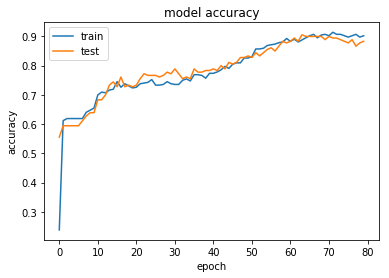

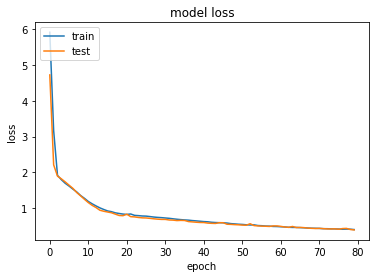

In [19]:
show_history(history)
scores.append(score)

In [20]:
history,score=create_model(best_activ,lr_values[2],80)

Train on 420 samples, validate on 180 samples
Epoch 1/80
420/420 [==============================] - 0s 767us/step - loss: 6.0896 - acc: 0.3690 - val_loss: 5.8751 - val_acc: 0.3944
Epoch 2/80
420/420 [==============================] - 0s 55us/step - loss: 5.4710 - acc: 0.3690 - val_loss: 5.1674 - val_acc: 0.4000
Epoch 3/80
420/420 [==============================] - 0s 52us/step - loss: 4.7578 - acc: 0.3738 - val_loss: 4.4320 - val_acc: 0.4000
Epoch 4/80
420/420 [==============================] - 0s 50us/step - loss: 4.0317 - acc: 0.3738 - val_loss: 3.6779 - val_acc: 0.4000
Epoch 5/80
420/420 [==============================] - 0s 52us/step - loss: 3.3172 - acc: 0.3738 - val_loss: 2.9963 - val_acc: 0.4000
Epoch 6/80
420/420 [==============================] - 0s 59us/step - loss: 2.7215 - acc: 0.3738 - val_loss: 2.4748 - val_acc: 0.4000
Epoch 7/80
420/420 [==============================] - 0s 57us/step - loss: 2.3031 - acc: 0.3786 - val_loss: 2.1636 - val_acc: 0.4278
Epoch 8/80
420/420 [==

Epoch 62/80
420/420 [==============================] - 0s 50us/step - loss: 1.6871 - acc: 0.6238 - val_loss: 1.6863 - val_acc: 0.6222
Epoch 63/80
420/420 [==============================] - 0s 43us/step - loss: 1.6820 - acc: 0.6238 - val_loss: 1.6823 - val_acc: 0.5944
Epoch 64/80
420/420 [==============================] - 0s 55us/step - loss: 1.6765 - acc: 0.6238 - val_loss: 1.6750 - val_acc: 0.6222
Epoch 65/80
420/420 [==============================] - 0s 55us/step - loss: 1.6708 - acc: 0.6262 - val_loss: 1.6656 - val_acc: 0.6222
Epoch 66/80
420/420 [==============================] - 0s 47us/step - loss: 1.6656 - acc: 0.6500 - val_loss: 1.6553 - val_acc: 0.6389
Epoch 67/80
420/420 [==============================] - 0s 59us/step - loss: 1.6585 - acc: 0.6405 - val_loss: 1.6518 - val_acc: 0.6222
Epoch 68/80
420/420 [==============================] - 0s 45us/step - loss: 1.6533 - acc: 0.6214 - val_loss: 1.6449 - val_acc: 0.5944
Epoch 69/80
420/420 [==============================] - 0s 55us

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


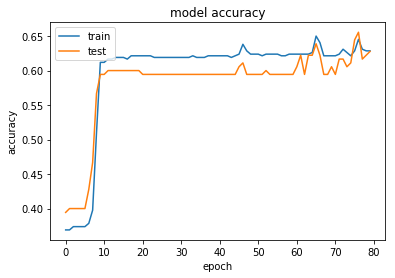

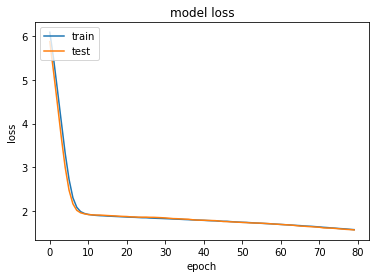

In [21]:
show_history(history)
scores.append(score)

In [22]:
print('Scores: %s' % scores)

best_score = scores[0]
best=0
for i in range(2):
    if(best_score<scores[i]):
        best_score=scores[i]
        best=i

print("Best learning rate: ", lr_values[best])
best_lr = lr_values[best]


Scores: [87.33333333333333, 89.00000007947287, 63.5]
Best learning rate:  0.005


## Find best epoch

In [23]:
scores = list()
epoch_value = 80

In [24]:
history,score=create_model(best_activ,best_lr,epoch_value)

Train on 420 samples, validate on 180 samples
Epoch 1/80
420/420 [==============================] - 0s 801us/step - loss: 5.6216 - acc: 0.0667 - val_loss: 3.8142 - val_acc: 0.5833
Epoch 2/80
420/420 [==============================] - 0s 47us/step - loss: 2.8420 - acc: 0.6167 - val_loss: 2.2542 - val_acc: 0.5944
Epoch 3/80
420/420 [==============================] - 0s 43us/step - loss: 2.0369 - acc: 0.6190 - val_loss: 2.0445 - val_acc: 0.5944
Epoch 4/80
420/420 [==============================] - 0s 55us/step - loss: 1.9590 - acc: 0.6190 - val_loss: 1.9877 - val_acc: 0.5944
Epoch 5/80
420/420 [==============================] - 0s 64us/step - loss: 1.9165 - acc: 0.6190 - val_loss: 1.9261 - val_acc: 0.5944
Epoch 6/80
420/420 [==============================] - 0s 57us/step - loss: 1.8556 - acc: 0.6190 - val_loss: 1.8559 - val_acc: 0.5944
Epoch 7/80
420/420 [==============================] - 0s 50us/step - loss: 1.7876 - acc: 0.6190 - val_loss: 1.7728 - val_acc: 0.5944
Epoch 8/80
420/420 [==

Epoch 62/80
420/420 [==============================] - 0s 36us/step - loss: 0.9155 - acc: 0.7524 - val_loss: 0.9304 - val_acc: 0.7667
Epoch 63/80
420/420 [==============================] - 0s 36us/step - loss: 0.9037 - acc: 0.7476 - val_loss: 0.8885 - val_acc: 0.7556
Epoch 64/80
420/420 [==============================] - 0s 36us/step - loss: 0.8877 - acc: 0.7429 - val_loss: 0.8808 - val_acc: 0.7556
Epoch 65/80
420/420 [==============================] - 0s 33us/step - loss: 0.8698 - acc: 0.7524 - val_loss: 0.8633 - val_acc: 0.7556
Epoch 66/80
420/420 [==============================] - 0s 31us/step - loss: 0.8539 - acc: 0.7643 - val_loss: 0.8631 - val_acc: 0.7667
Epoch 67/80
420/420 [==============================] - 0s 28us/step - loss: 0.8302 - acc: 0.7548 - val_loss: 0.8248 - val_acc: 0.7611
Epoch 68/80
420/420 [==============================] - 0s 31us/step - loss: 0.8114 - acc: 0.7714 - val_loss: 0.8084 - val_acc: 0.7667
Epoch 69/80
420/420 [==============================] - 0s 31us

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


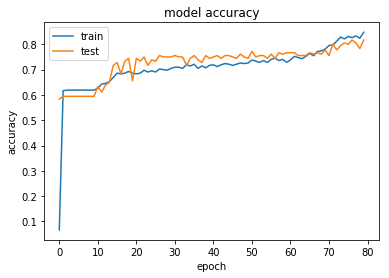

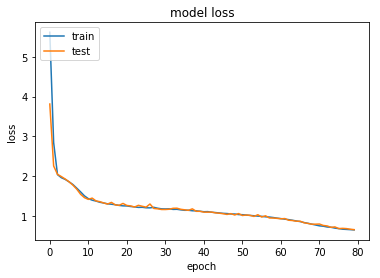

In [25]:
show_history(history)
scores.append(score)
epoch_value = int(epoch_value + (epoch_value/2))

In [26]:
history,score=create_model(best_activ,best_lr,epoch_value)

Train on 420 samples, validate on 180 samples
Epoch 1/120
420/420 [==============================] - 0s 1ms/step - loss: 4.2563 - acc: 0.5738 - val_loss: 2.4335 - val_acc: 0.5944
Epoch 2/120
420/420 [==============================] - 0s 52us/step - loss: 2.1173 - acc: 0.6143 - val_loss: 2.1410 - val_acc: 0.5944
Epoch 3/120
420/420 [==============================] - 0s 71us/step - loss: 2.0173 - acc: 0.6214 - val_loss: 2.0106 - val_acc: 0.5944
Epoch 4/120
420/420 [==============================] - 0s 71us/step - loss: 1.9445 - acc: 0.6190 - val_loss: 1.9849 - val_acc: 0.5944
Epoch 5/120
420/420 [==============================] - 0s 52us/step - loss: 1.9161 - acc: 0.6190 - val_loss: 1.9443 - val_acc: 0.5944
Epoch 6/120
420/420 [==============================] - 0s 55us/step - loss: 1.8958 - acc: 0.6190 - val_loss: 1.9018 - val_acc: 0.5944
Epoch 7/120
420/420 [==============================] - 0s 43us/step - loss: 1.8586 - acc: 0.6190 - val_loss: 1.8717 - val_acc: 0.5944
Epoch 8/120
420/4

Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


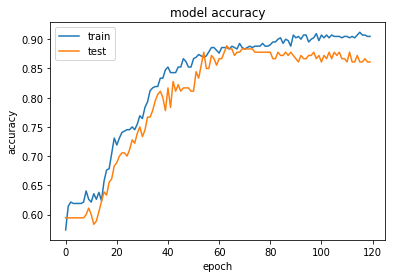

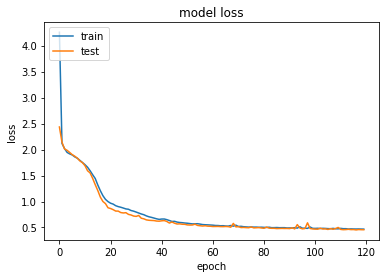

In [27]:
show_history(history)
scores.append(score)
epoch_value = int(epoch_value + (epoch_value/2))

In [28]:
history,score=create_model(best_activ,best_lr,epoch_value)

Train on 420 samples, validate on 180 samples
Epoch 1/180
420/420 [==============================] - 0s 947us/step - loss: 4.3853 - acc: 0.3786 - val_loss: 2.3542 - val_acc: 0.4556
Epoch 2/180
420/420 [==============================] - 0s 47us/step - loss: 2.1201 - acc: 0.6190 - val_loss: 1.9918 - val_acc: 0.5944
Epoch 3/180
420/420 [==============================] - 0s 59us/step - loss: 1.8798 - acc: 0.6119 - val_loss: 1.8693 - val_acc: 0.5611
Epoch 4/180
420/420 [==============================] - 0s 57us/step - loss: 1.8017 - acc: 0.5810 - val_loss: 1.7858 - val_acc: 0.5500
Epoch 5/180
420/420 [==============================] - 0s 59us/step - loss: 1.7465 - acc: 0.5905 - val_loss: 1.7192 - val_acc: 0.5944
Epoch 6/180
420/420 [==============================] - 0s 69us/step - loss: 1.6807 - acc: 0.6167 - val_loss: 1.6621 - val_acc: 0.5944
Epoch 7/180
420/420 [==============================] - 0s 45us/step - loss: 1.6141 - acc: 0.6190 - val_loss: 1.6115 - val_acc: 0.5889
Epoch 8/180
420

420/420 [==============================] - 0s 55us/step - loss: 0.4107 - acc: 0.8952 - val_loss: 0.3822 - val_acc: 0.8444
Epoch 122/180
420/420 [==============================] - 0s 40us/step - loss: 0.4074 - acc: 0.8929 - val_loss: 0.3857 - val_acc: 0.8500
Epoch 123/180
420/420 [==============================] - 0s 52us/step - loss: 0.4044 - acc: 0.8952 - val_loss: 0.3690 - val_acc: 0.8444
Epoch 124/180
420/420 [==============================] - 0s 45us/step - loss: 0.3913 - acc: 0.8929 - val_loss: 0.3717 - val_acc: 0.8500
Epoch 125/180
420/420 [==============================] - 0s 57us/step - loss: 0.3858 - acc: 0.8976 - val_loss: 0.3697 - val_acc: 0.8611
Epoch 126/180
420/420 [==============================] - 0s 59us/step - loss: 0.3824 - acc: 0.8929 - val_loss: 0.3595 - val_acc: 0.8389
Epoch 127/180
420/420 [==============================] - 0s 45us/step - loss: 0.3770 - acc: 0.8976 - val_loss: 0.3589 - val_acc: 0.8722
Epoch 128/180
420/420 [==============================] - 0s 45

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


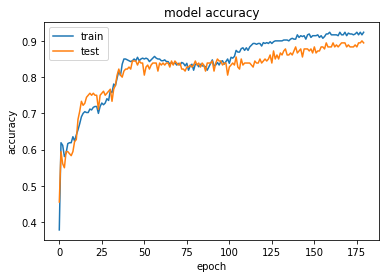

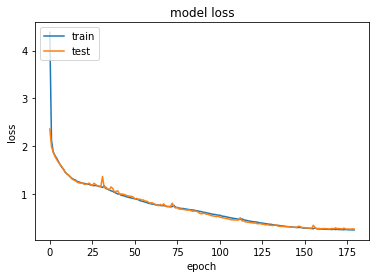

In [29]:
show_history(history)
scores.append(score)

In [30]:
print('Scores: %s' % scores)

epoch = 80
best_epoch = epoch
for i in range(2):
    epoch = epoch + (epoch/2)
    if(scores[i]<scores[i+1]):
        best_epoch = epoch

best_epoch=int(best_epoch)
print("Best epoch: ", best_epoch)


Scores: [82.66666666666667, 89.0, 92.0]
Best epoch:  180


# Part 2: Digit recognition using CNNs

In [3]:
import numpy
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop


## Load Dataset

In [4]:
# MNSIT dataseti indir
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(X_train.shape)

#train datasetini uygun formata çevir
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print(X_train.shape)

X_train = X_train / 255 #normalizasyon
X_test = X_test / 255

Y_train = np_utils.to_categorical(y_train, 10) #class vektörünü binary matrise çevir
Y_test = np_utils.to_categorical(y_test, 10)



(60000, 28, 28)
(60000, 28, 28, 1)


## AlexNet with no change

In [20]:
model = Sequential()

 # 1st Convolutional Layer
model.add(Convolution2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11),strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Convolution2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

 # 3rd Convolutional Layer
model.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Convolution2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(28,28,1,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

adam = optimizers.Adam(lr=0.002)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1, validation_split=0.2, shuffle=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 7, 7, 96)          11712     
_________________________________________________________________
activation_30 (Activation)   (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 256)         2973952   
_________________________________________________________________
activation_31 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 256)         0         
__________

## AlexNet Architecture with changes

In [5]:
def alex_net(d1_node, d2_node,d3_node,lr,del_3_layer,del_4_layer):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Convolution2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11),strides=(4,4), padding='same'))
    model.add(Activation('relu'))
    # Pooling 
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Convolution2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
    model.add(Activation('tanh'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    # Batch Normalisation
    model.add(BatchNormalization())

    if(del_3_layer == False):
        # 3rd Convolutional Layer
        model.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
        model.add(Activation('relu'))
        # Batch Normalisation
        model.add(BatchNormalization())

    if(del_4_layer == False):
        # 4th Convolutional Layer
        model.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
        model.add(Activation('relu'))
        # Batch Normalisation
        model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Convolution2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('linear'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(d1_node, input_shape=(28,28,1,)))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 2nd Dense Layer
    model.add(Dense(d2_node))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Dense Layer
    model.add(Dense(d3_node))
    model.add(Activation('relu'))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.summary()
    
    adam = optimizers.Adam(lr=lr)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    history=model.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1, validation_split=0.2, shuffle=True)
    return history


In [7]:
del_3_layer=del_4_layer = False  #Başlangıç için alexnet mimarisine girecek parametreler. 3. ve 4. layer dahil ve learning rate 0.02
lr=0.002

## First learning rate for AlexNet

In [23]:
d1_node = d2_node = 4096
d3_node =1000
history=alex_net(d1_node,d2_node,d3_node,lr,del_3_layer,del_4_layer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 7, 7, 96)          11712     
_________________________________________________________________
activation_39 (Activation)   (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 256)         2973952   
_________________________________________________________________
activation_40 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 2, 2, 256)         0         
__________

## Second learning rate for AlexNet

In [38]:
lr=0.02
d1_node = d2_node = 4096
d3_node =1000
history=alex_net(d1_node,d2_node,d3_node,lr,del_3_layer,del_4_layer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 7, 7, 96)          11712     
_________________________________________________________________
activation_10 (Activation)   (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)         2973952   
_________________________________________________________________
activation_11 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 256)         0         
__________

## Change the number of nodes in the fully connected layer by 10%

In [8]:
lr=0.002
d1_node = d2_node = 4096
d3_node =1000
d1_node -= int(d1_node*10/100)
d2_node -= int(d2_node*10/100)
d3_node -= int(d3_node*10/100)
history=alex_net(d1_node,d2_node,d3_node,lr,del_3_layer,del_4_layer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 7, 7, 96)          11712     
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
__________

## Remove the third layer from the output

In [9]:
del_3_layer= True  
history=alex_net(d1_node,d2_node,d3_node,lr,del_3_layer,del_4_layer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 7, 7, 96)          11712     
_________________________________________________________________
activation_10 (Activation)   (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)         2973952   
_________________________________________________________________
activation_11 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 256)         0         
__________

## Continuing with %20 of the nodes, Remove the third and fourth layers from the output and 

In [10]:
del_4_layer = True 
d1_node -= int(d1_node*10/100)
d2_node -= int(d2_node*10/100)
d3_node -= int(d3_node*10/100)
history=alex_net(d1_node,d2_node,d3_node,lr,del_3_layer,del_4_layer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 7, 7, 96)          11712     
_________________________________________________________________
activation_18 (Activation)   (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 256)         2973952   
_________________________________________________________________
activation_19 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 256)         0         
__________